In [1]:
from sklearn.datasets import make_circles
import matplotlib.pyplot as plt 
from mpl_toolkits.mplot3d import Axes3D
import numpy as np 

In [2]:
X, Y = make_circles(n_samples=500, noise=0.05)

In [3]:
X.shape, Y.shape

((500, 2), (500,))

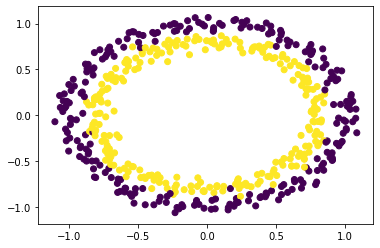

In [6]:
plt.scatter(X[:, 0], X[:, 1], c = Y)
plt.show()

In [11]:
def phi(X):
    X_1 = X[:, 0]
    X_2 = X[:, 1]
    X_3 = X_1**2 + X_2**2

    X_ = np.zeros((X.shape[0], 3))

    X_[:, 0] = X_1  
    X_[:, 1] = X_2
    X_[:, 2] = X_3

    return X_

In [14]:
X_ = phi(X)

In [15]:
X_

array([[ 1.02489576,  0.09152948,  1.05878896],
       [-0.7159884 ,  0.29375158,  0.59892938],
       [ 0.82527423, -0.07455715,  0.68663632],
       ...,
       [ 0.79188163,  0.17932194,  0.65923287],
       [ 0.89905071,  0.46907212,  1.02832083],
       [-0.49708795,  0.51347705,  0.51075511]])

In [17]:
def plot3D(X):
    fig = plt.figure(figsize=(10,10))
    ax = fig.add_subplot(111, projection='3d')

    X1 = X[:, 0]
    X2 = X[:, 1]
    X3 = X[:, 2]

    ax.scatter(X1, X2, X3, zdir='z', s=20, c=Y, depthshade = True)
    plt.show()

    return ax

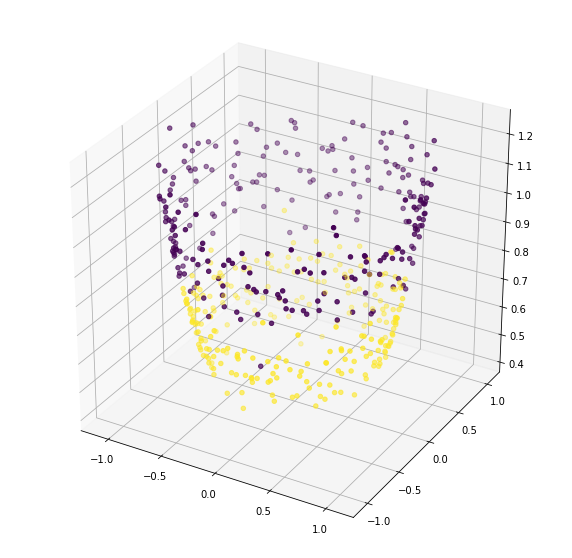

In [19]:
ax = plot3D(X_)

In [20]:
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import cross_val_score

In [21]:
lr = LogisticRegression()

## For original dataset

In [23]:
acc = cross_val_score(lr, X, Y, cv=5).mean()
print(acc)

0.45599999999999996


## For 3D dataset

In [24]:
acc = cross_val_score(lr, X_, Y, cv=5).mean()
print(acc)

0.976


In [26]:
lr.fit(X_, Y)

LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
                   intercept_scaling=1, l1_ratio=None, max_iter=100,
                   multi_class='auto', n_jobs=None, penalty='l2',
                   random_state=None, solver='lbfgs', tol=0.0001, verbose=0,
                   warm_start=False)

In [29]:
wts = lr.coef_

In [30]:
bias = lr.intercept_

In [31]:
xx, yy = np.meshgrid(range(-2, 2), range(-2, 2))

In [32]:
xx, yy

(array([[-2, -1,  0,  1],
        [-2, -1,  0,  1],
        [-2, -1,  0,  1],
        [-2, -1,  0,  1]]),
 array([[-2, -2, -2, -2],
        [-1, -1, -1, -1],
        [ 0,  0,  0,  0],
        [ 1,  1,  1,  1]]))